In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\RAVI OJHA\Desktop\DATA SETS\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

I dropped EmployeeNumber, EmployeeCount, Over18, and StandardHours because they don’t add predictive value — they’re either constant or identifiers.

In [6]:
df.drop(["EmployeeCount","Over18","StandardHours","EmployeeNumber"],axis=1,inplace=True)

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

Employee Attrition Count

In [9]:
df["Attrition"].value_counts(normalize=True)*100

Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64

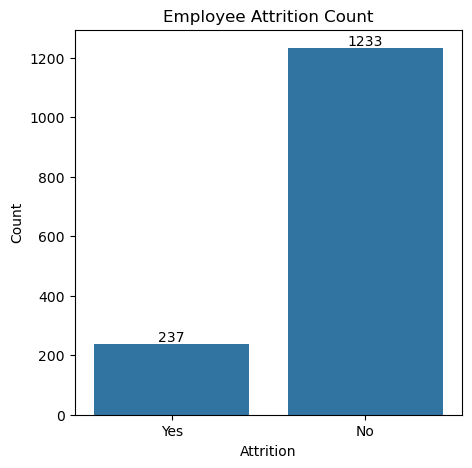

In [10]:
plt.figure(figsize=(5,5))
att=sns.countplot(x="Attrition",data=df)
plt.title("Employee Attrition Count")
plt.xlabel("Attrition")
plt.ylabel("Count")
for i in att.containers:
    plt.bar_label(i)
plt.show()

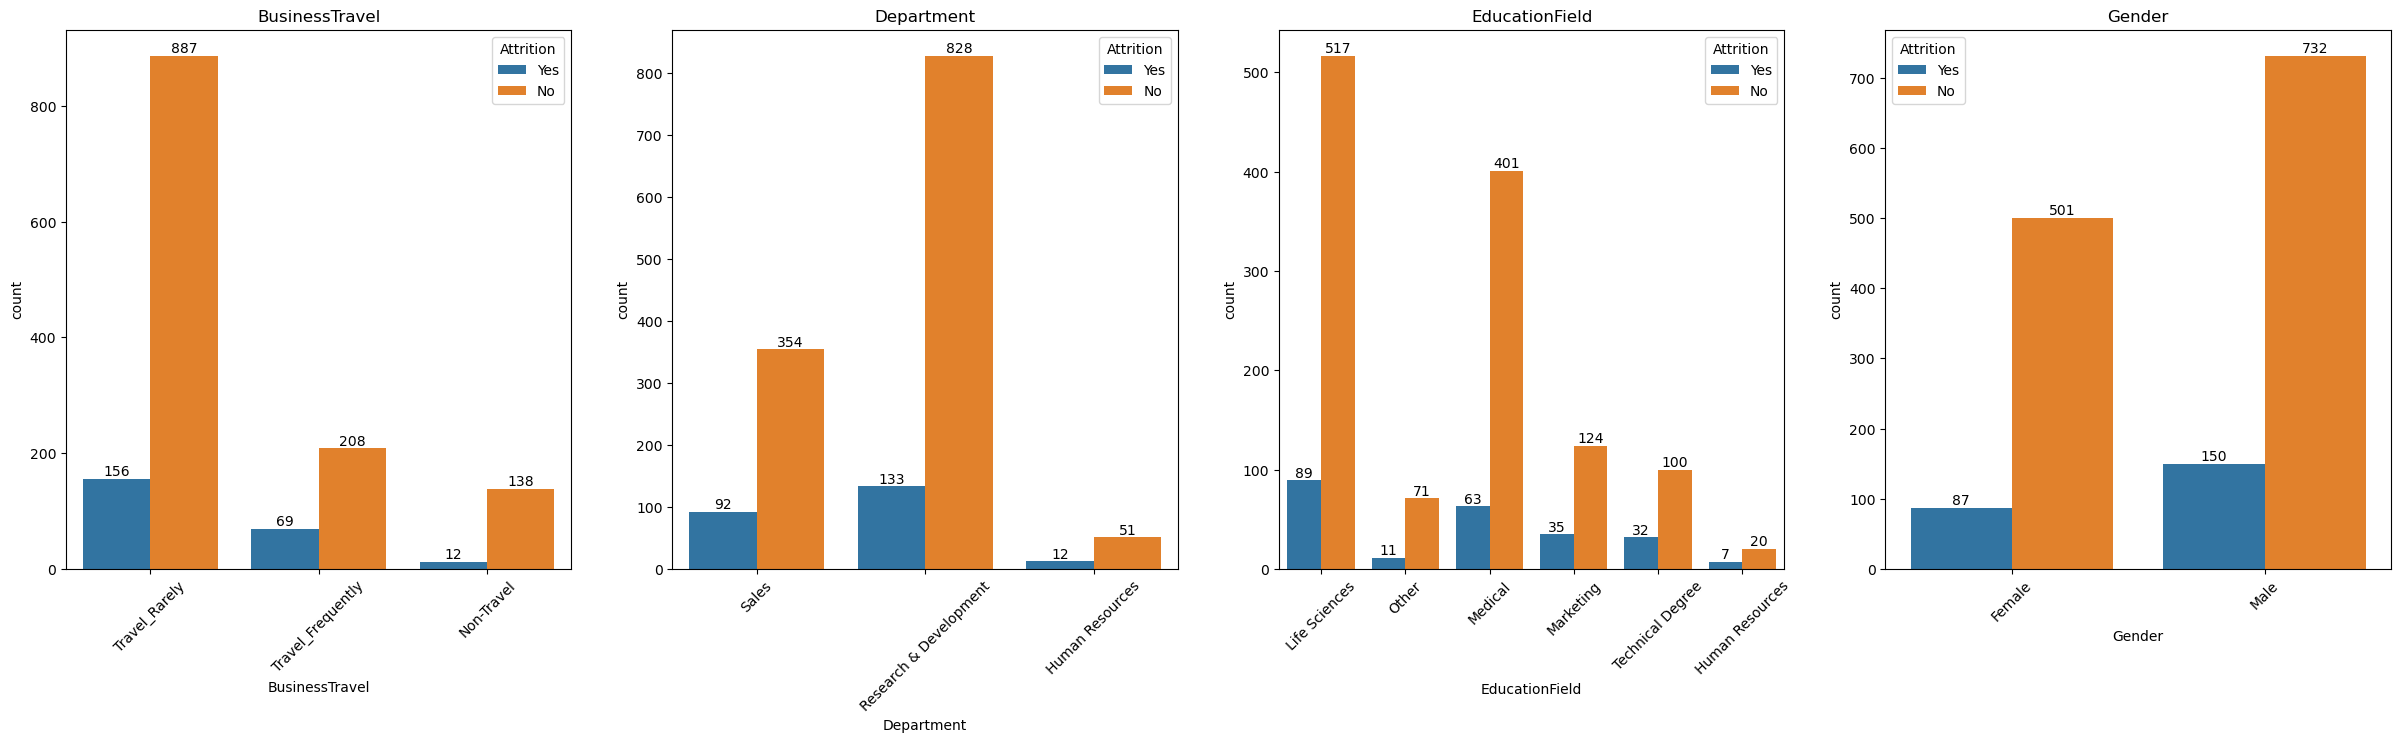

In [11]:


plt.figure(figsize=(30,7))  
# Subplot 1
plt.subplot(1,4,1)
bta = sns.countplot(x="BusinessTravel", hue="Attrition", data=df)
plt.title("BusinessTravel")
plt.xticks(rotation=45)
for i in bta.containers:
    plt.bar_label(i)

# Subplot 2
plt.subplot(1,4,2)
dpa = sns.countplot(x="Department", hue="Attrition", data=df)
plt.title("Department")
plt.xticks(rotation=45)
for i in dpa.containers:
    plt.bar_label(i)

# Subplot 3
plt.subplot(1,4,3)
efa = sns.countplot(x="EducationField", hue="Attrition", data=df)
plt.title("EducationField")
plt.xticks(rotation=45)
for i in efa.containers:
    plt.bar_label(i)

# Subplot 4
plt.subplot(1,4,4)
ga = sns.countplot(x="Gender", hue="Attrition", data=df)
plt.title("Gender")
plt.xticks(rotation=45)
for i in ga.containers:
    plt.bar_label(i)



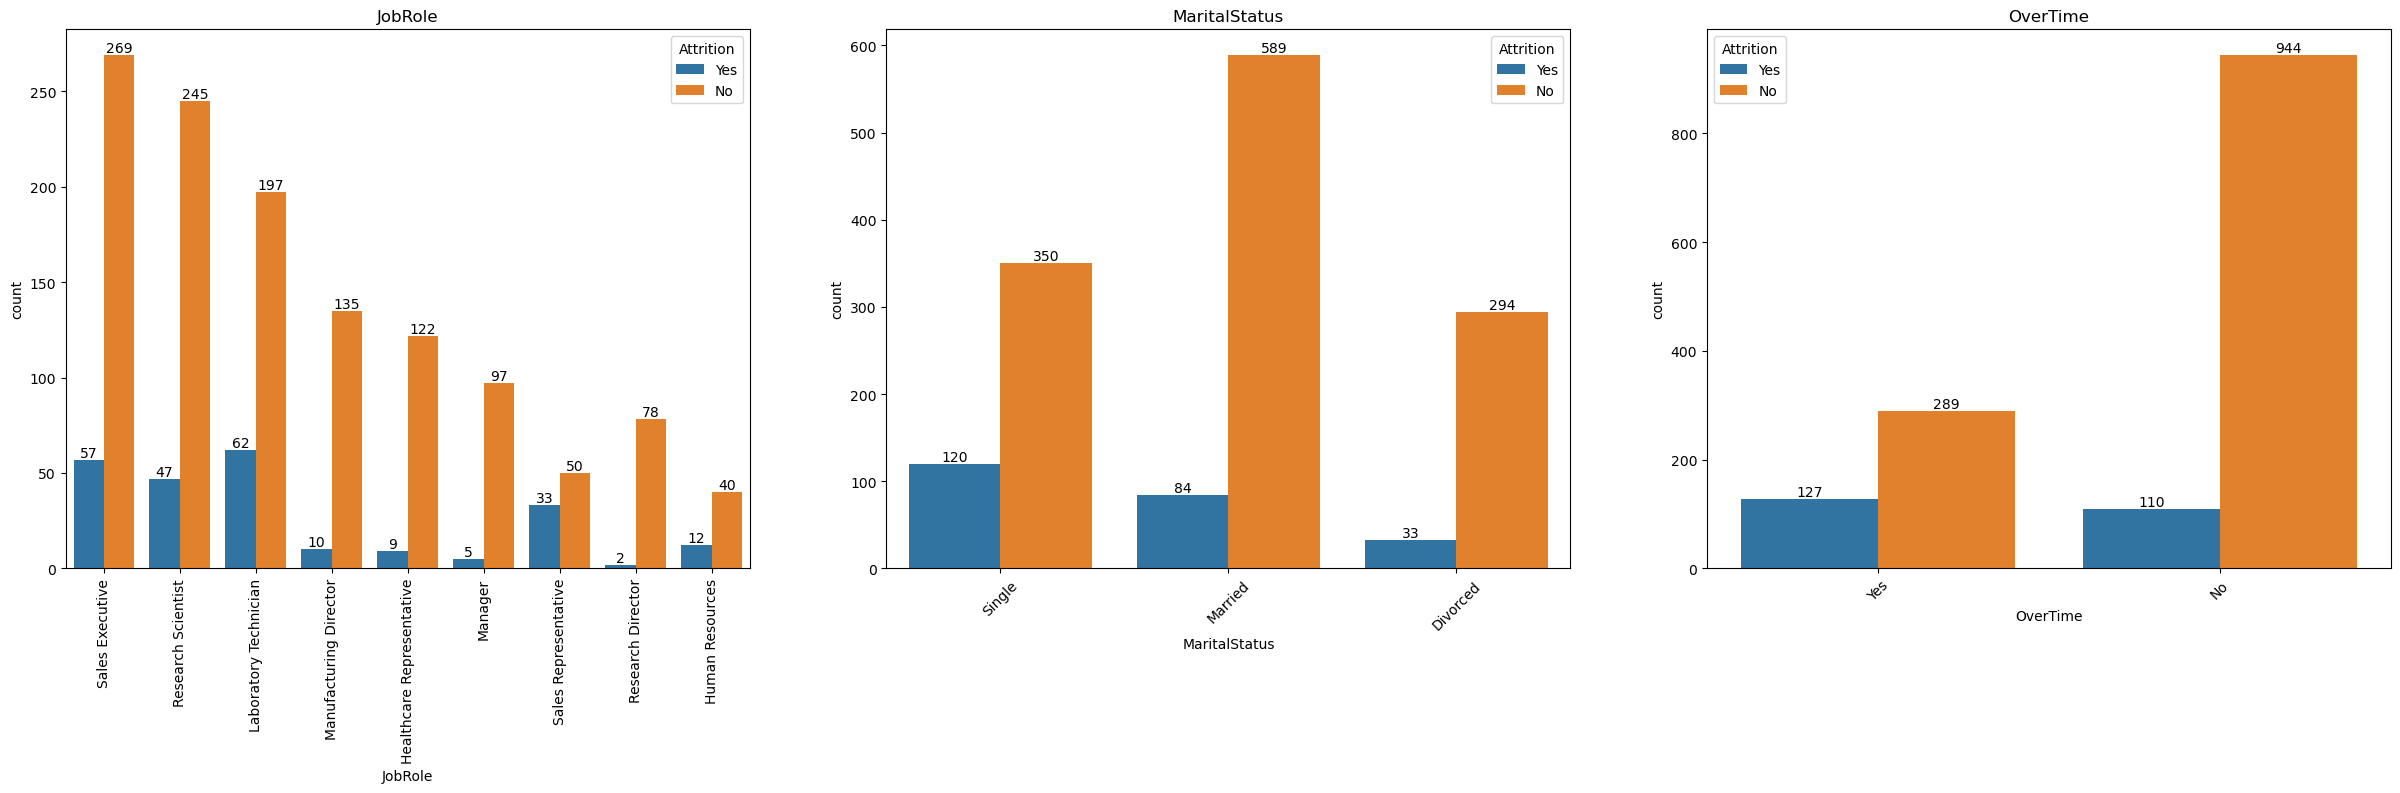

In [12]:
plt.figure(figsize=(30,7))  


# Subplot 1
plt.subplot(1,3,1)
jra = sns.countplot(x="JobRole", hue="Attrition", data=df)
plt.title("JobRole")
plt.xticks(rotation=90)
for i in jra.containers:
    plt.bar_label(i)

# Subplot 2
plt.subplot(1,3,2)
msa = sns.countplot(x="MaritalStatus", hue="Attrition", data=df)
plt.title("MaritalStatus")
plt.xticks(rotation=45)
for i in msa.containers:
    plt.bar_label(i)

# Subplot 3
plt.subplot(1,3,3)
ota = sns.countplot(x="OverTime", hue="Attrition", data=df)
plt.title("OverTime")
plt.xticks(rotation=45)
for i in ota.containers:
    plt.bar_label(i)


plt.show()


AGE VS ATTRITION

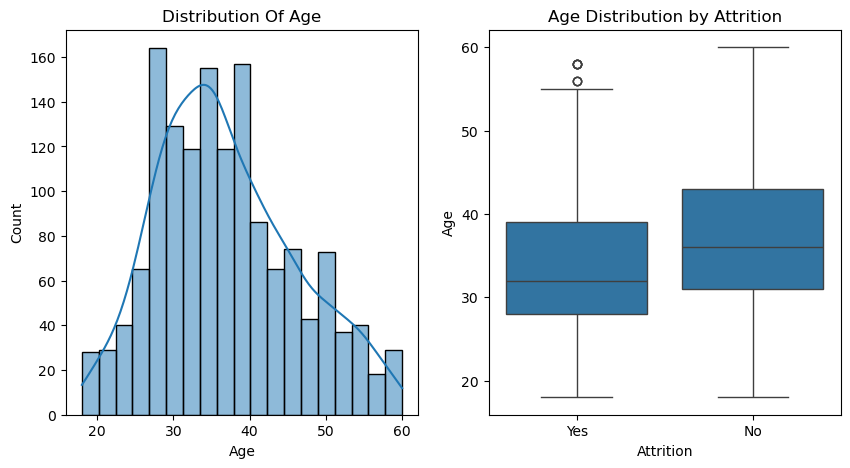

<Figure size 640x480 with 0 Axes>

In [13]:
plt.figure(figsize=[10,5])


plt.subplot(1,2,1)
sns.histplot(df["Age"],kde=True)
plt.title("Distribution Of Age")

plt.subplot(1,2,2)
sns.boxplot(x="Attrition",y="Age",data=df)
plt.title("Age Distribution by Attrition")
plt.show()
plt.tight_layout()

DISTANCE FROM HOME VS ATTRITION

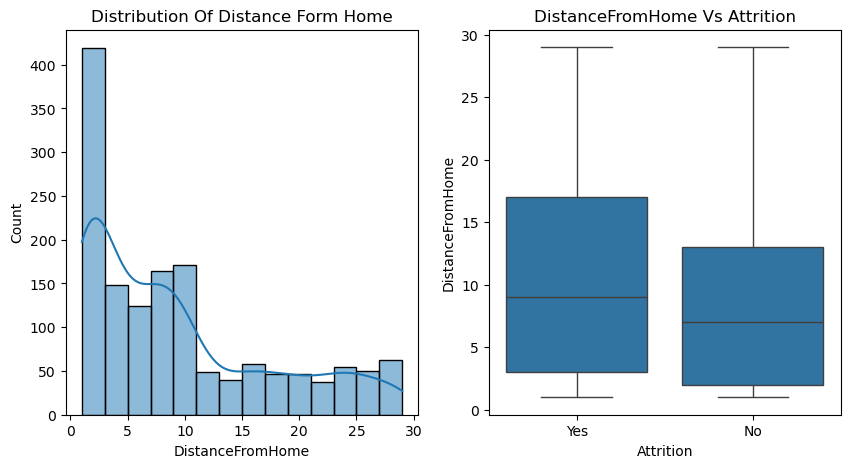

<Figure size 640x480 with 0 Axes>

In [14]:
plt.figure(figsize=[10,5])

plt.subplot(1,2,1)
sns.histplot(x="DistanceFromHome",kde=True,data=df)
plt.title("Distribution Of Distance Form Home")

plt.subplot(1,2,2)
sns.boxplot(x="Attrition",y="DistanceFromHome",data=df)
plt.title("DistanceFromHome Vs Attrition")

plt.show()
plt.tight_layout()

MONTHLY INCOME VS ATTRITION

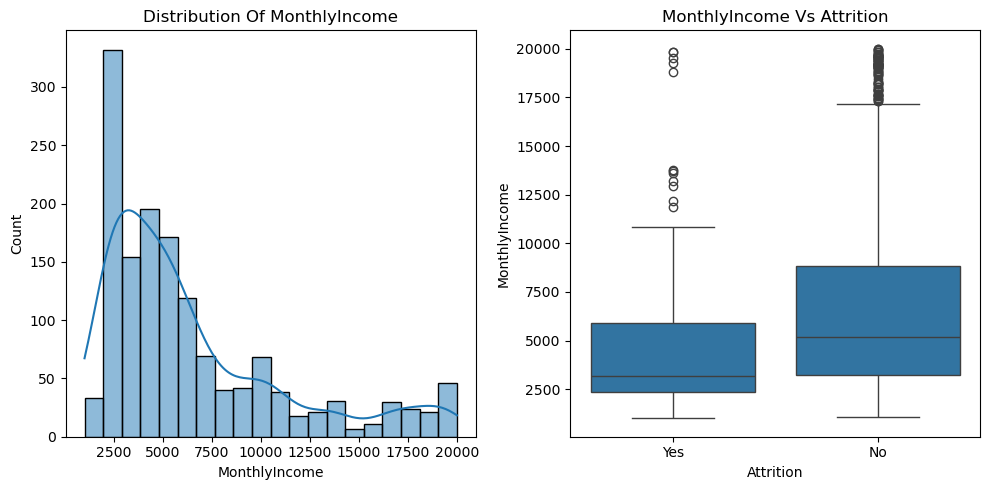

In [15]:
plt.figure(figsize=[10,5])

plt.subplot(1,2,1)
sns.histplot(x="MonthlyIncome",kde=True,data=df)
plt.title("Distribution Of MonthlyIncome")

plt.subplot(1,2,2)
sns.boxplot(x="Attrition",y="MonthlyIncome",data=df)
plt.title("MonthlyIncome Vs Attrition")
plt.tight_layout()
plt.show()


NumCompaniesWorked Vs Attrition

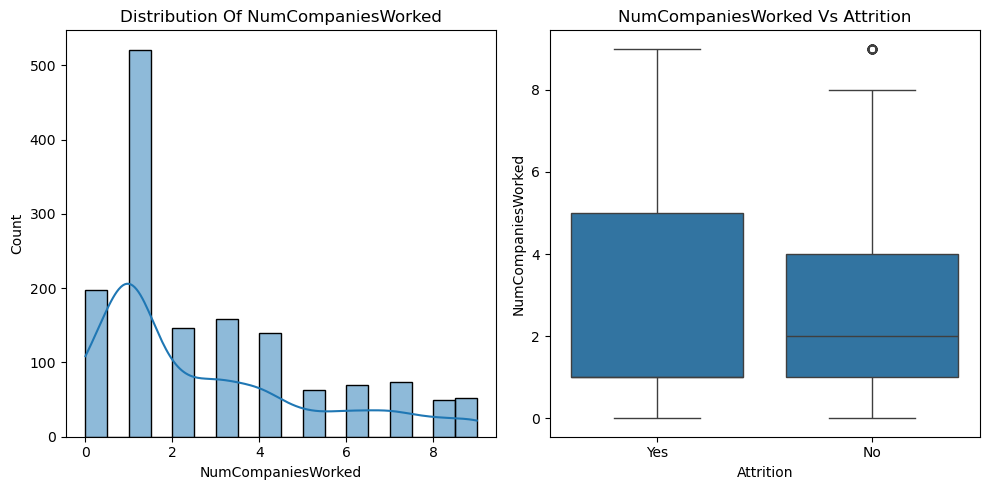

In [16]:
plt.figure(figsize=[10,5])

plt.subplot(1,2,1)
sns.histplot(x="NumCompaniesWorked",kde=True,data=df)
plt.title("Distribution Of NumCompaniesWorked")

plt.subplot(1,2,2)
sns.boxplot(x="Attrition",y="NumCompaniesWorked",data=df)
plt.title("NumCompaniesWorked Vs Attrition")

plt.tight_layout()
plt.show()

PercentSalaryHike Vs Attrition

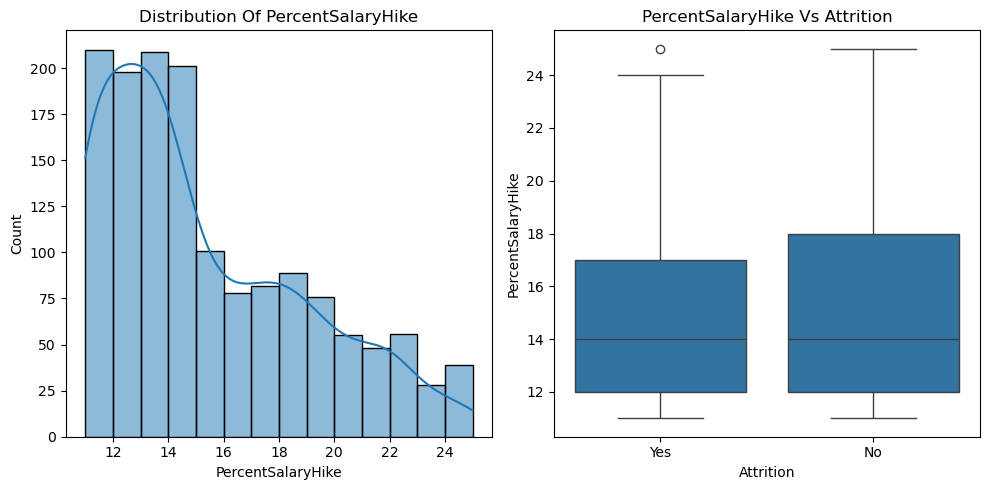

In [17]:
plt.figure(figsize=[10,5])

plt.subplot(1,2,1)
sns.histplot(x="PercentSalaryHike",kde=True,data=df)
plt.title("Distribution Of PercentSalaryHike")

plt.subplot(1,2,2)
sns.boxplot(x="Attrition",y="PercentSalaryHike",data=df)
plt.title("PercentSalaryHike Vs Attrition")
plt.tight_layout()
plt.show()

TotalWorkingYears Vs Attrition

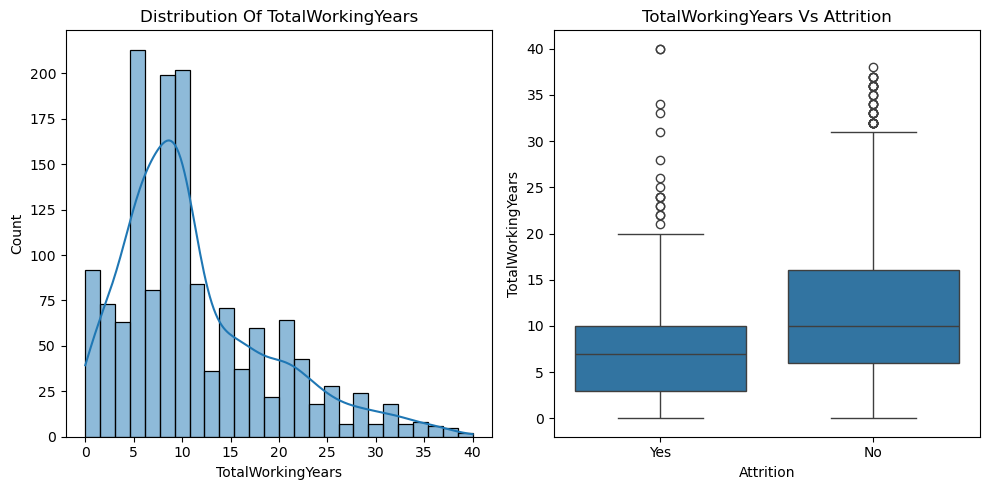

In [18]:
plt.figure(figsize=[10,5])

plt.subplot(1,2,1)
sns.histplot(x="TotalWorkingYears",kde=True,data=df)
plt.title("Distribution Of TotalWorkingYears")

plt.subplot(1,2,2)
sns.boxplot(x="Attrition",y="TotalWorkingYears",data=df)
plt.title("TotalWorkingYears Vs Attrition")

plt.tight_layout()
plt.show()

TrainingTimesLastYear Vs Attrition

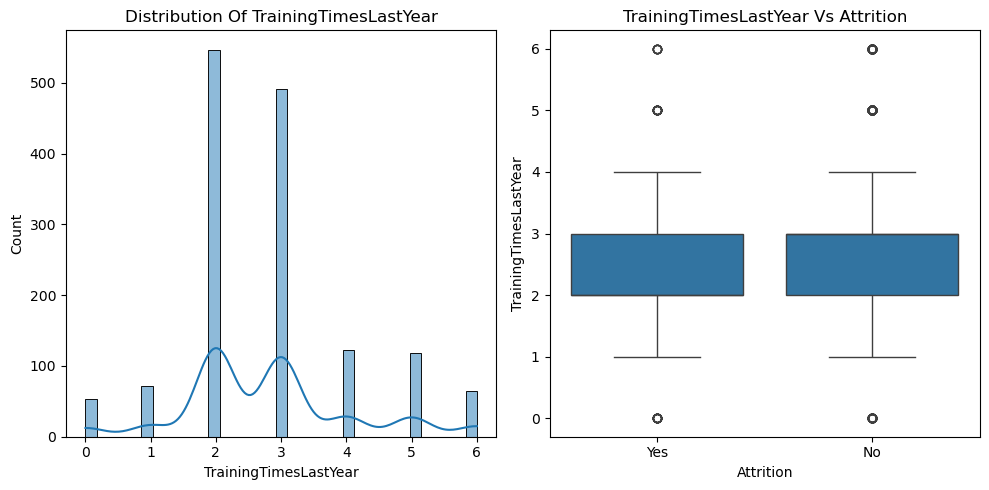

In [19]:
plt.figure(figsize=[10,5])

plt.subplot(1,2,1)
sns.histplot(x="TrainingTimesLastYear",kde=True,data=df)
plt.title("Distribution Of TrainingTimesLastYear")

plt.subplot(1,2,2)
sns.boxplot(x="Attrition",y="TrainingTimesLastYear",data=df)
plt.title("TrainingTimesLastYear Vs Attrition")

plt.tight_layout()
plt.show()

YearsAtCompany Vs Attrition

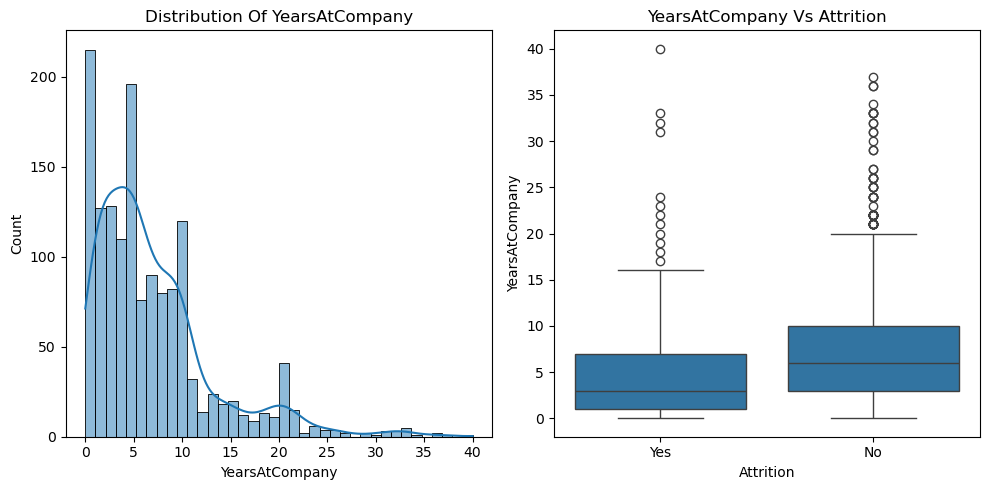

In [20]:
plt.figure(figsize=[10,5])

plt.subplot(1,2,1)
sns.histplot(x="YearsAtCompany",kde=True,data=df)
plt.title("Distribution Of YearsAtCompany")

plt.subplot(1,2,2)
sns.boxplot(x="Attrition",y="YearsAtCompany",data=df)
plt.title("YearsAtCompany Vs Attrition")

plt.tight_layout()
plt.show()

YearsInCurrentRole Vs Attrition

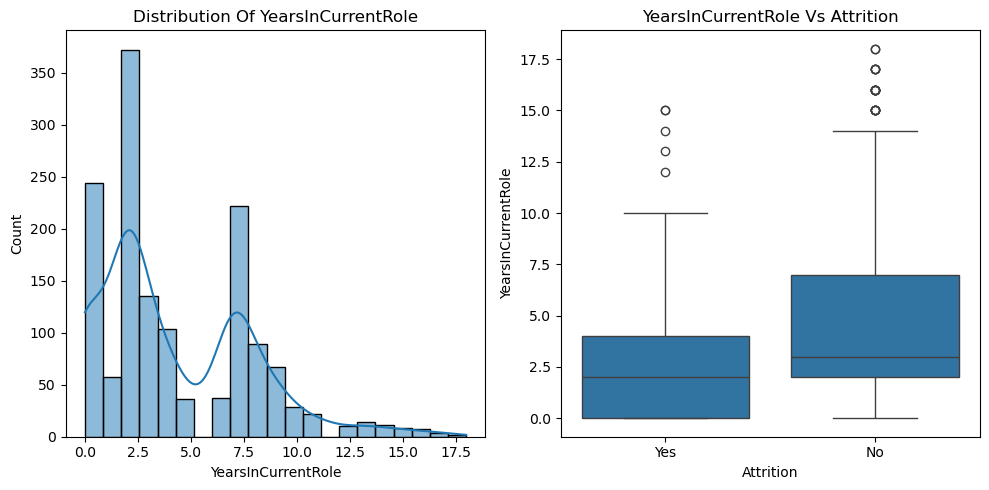

In [21]:
plt.figure(figsize=[10,5])

plt.subplot(1,2,1)
sns.histplot(x="YearsInCurrentRole",kde=True,data=df)
plt.title("Distribution Of YearsInCurrentRole")

plt.subplot(1,2,2)
sns.boxplot(x="Attrition",y="YearsInCurrentRole",data=df)
plt.title("YearsInCurrentRole Vs Attrition")

plt.tight_layout()
plt.show()

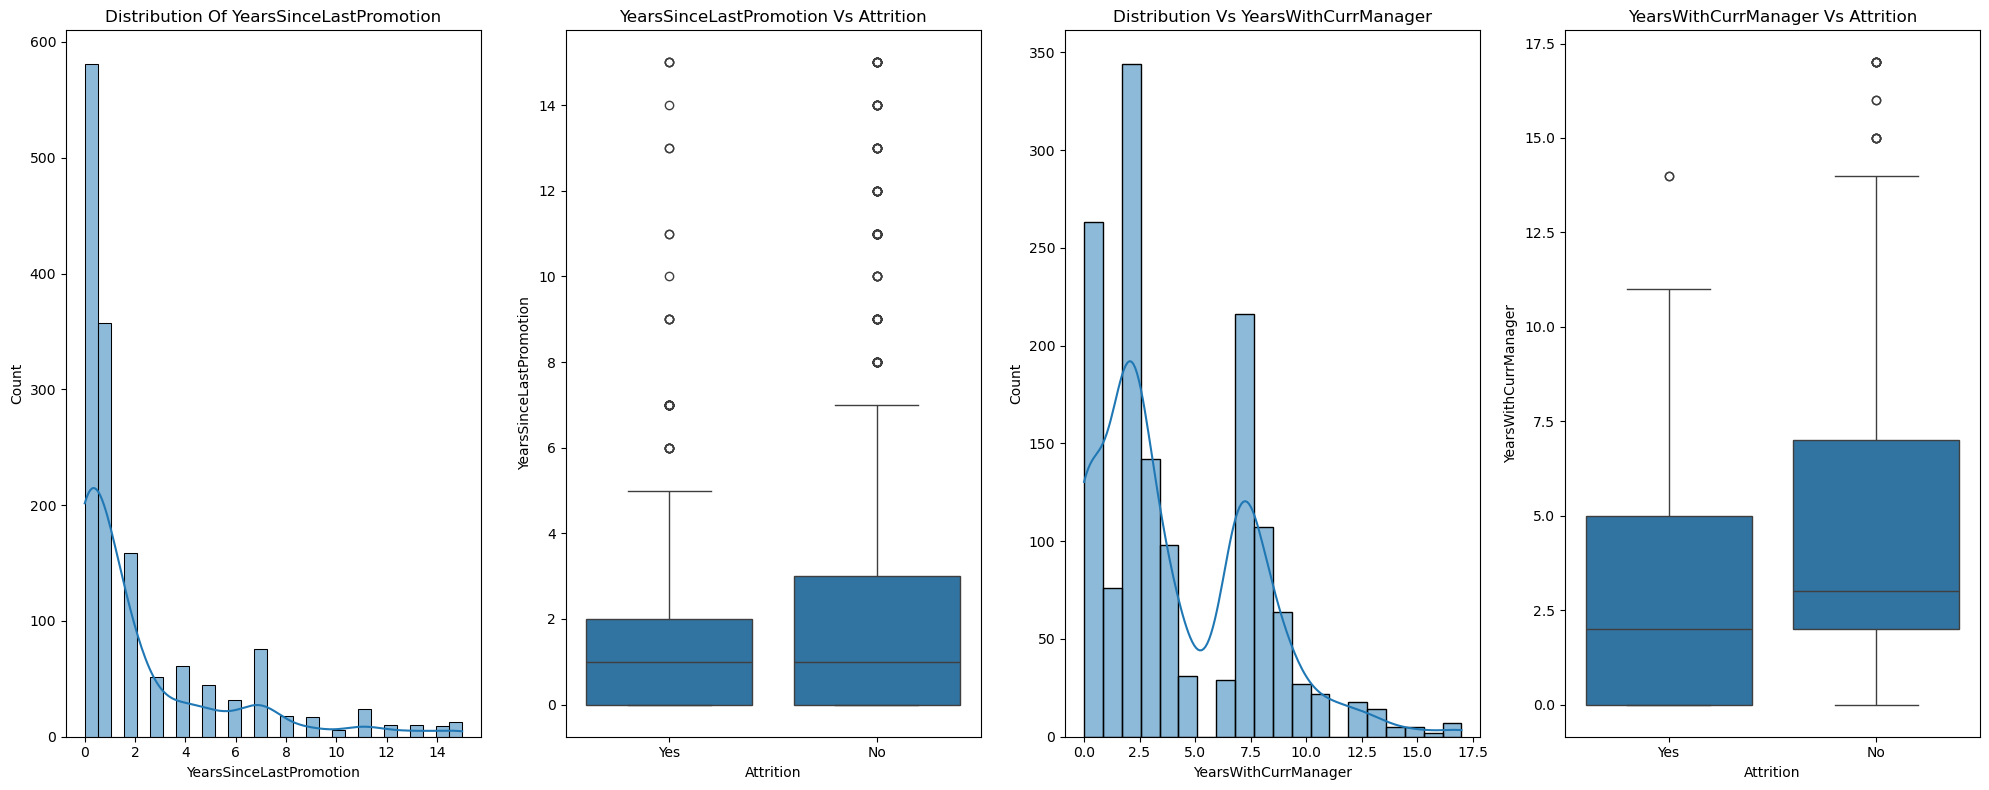

In [22]:
plt.figure(figsize=[20,8])

plt.subplot(1,4,1)
sns.histplot(x="YearsSinceLastPromotion",kde=True,data=df)
plt.title("Distribution Of YearsSinceLastPromotion")

plt.subplot(1,4,2)
sns.boxplot(x="Attrition",y="YearsSinceLastPromotion",data=df)
plt.title("YearsSinceLastPromotion Vs Attrition")

plt.subplot(1,4,3)
sns.histplot(x="YearsWithCurrManager",kde=True,data=df)
plt.title("Distribution Vs YearsWithCurrManager")

plt.subplot(1,4,4)
sns.boxplot(x="Attrition",y="YearsWithCurrManager",data=df)
plt.title("YearsWithCurrManager Vs Attrition")

plt.tight_layout()
plt.show()

HeatMap

<function matplotlib.pyplot.title(label: 'str', fontdict: 'dict[str, Any] | None' = None, loc: "Literal['left', 'center', 'right'] | None" = None, pad: 'float | None' = None, *, y: 'float | None' = None, **kwargs) -> 'Text'>

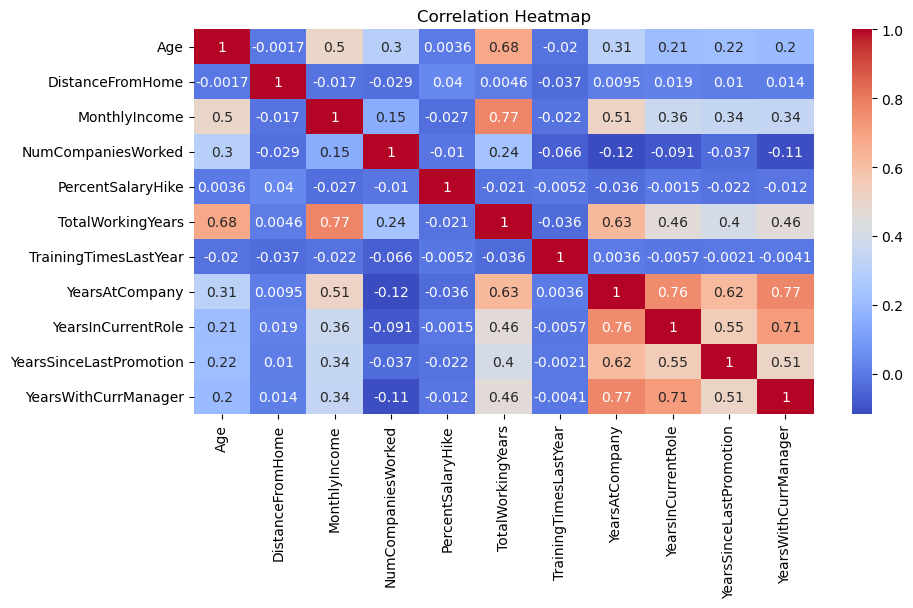

In [23]:
numerical_cols = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
                  'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
                  'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
                  'YearsWithCurrManager']


corr=df[numerical_cols].corr()

plt.figure(figsize=[10,5])
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.title

MaritalStatus vs JobRole

In [24]:
corsstab=pd.crosstab(df["MaritalStatus"],df["JobRole"])
print(corsstab)

JobRole        Healthcare Representative  Human Resources  \
MaritalStatus                                               
Divorced                              34               14   
Married                               61               28   
Single                                36               10   

JobRole        Laboratory Technician  Manager  Manufacturing Director  \
MaritalStatus                                                           
Divorced                          55       23                      36   
Married                          116       56                      67   
Single                            88       23                      42   

JobRole        Research Director  Research Scientist  Sales Executive  \
MaritalStatus                                                           
Divorced                      23                  62               69   
Married                       38                 122              151   
Single                        19    

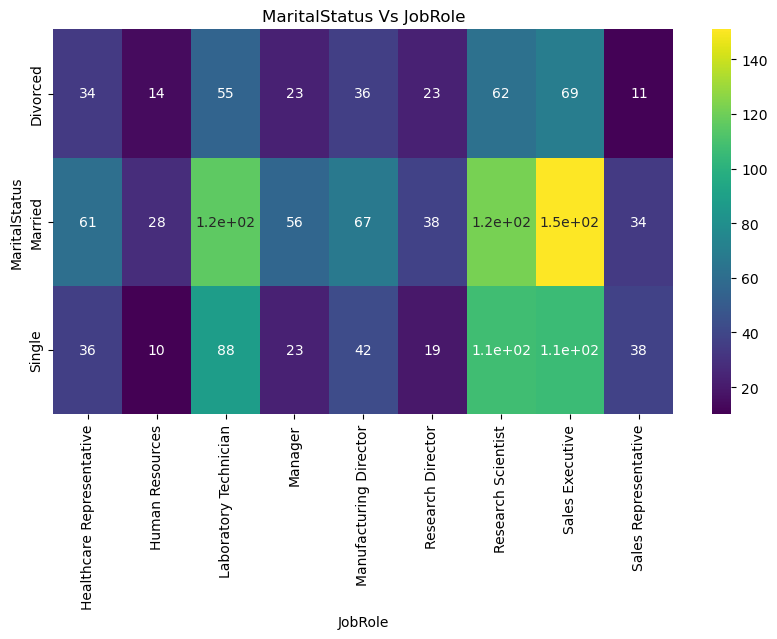

In [25]:
plt.figure(figsize=[10,5])
sns.heatmap(corsstab,annot=True,cmap="viridis")
plt.title("MaritalStatus Vs JobRole")
plt.show()

MonthlyIncome vs JobRole

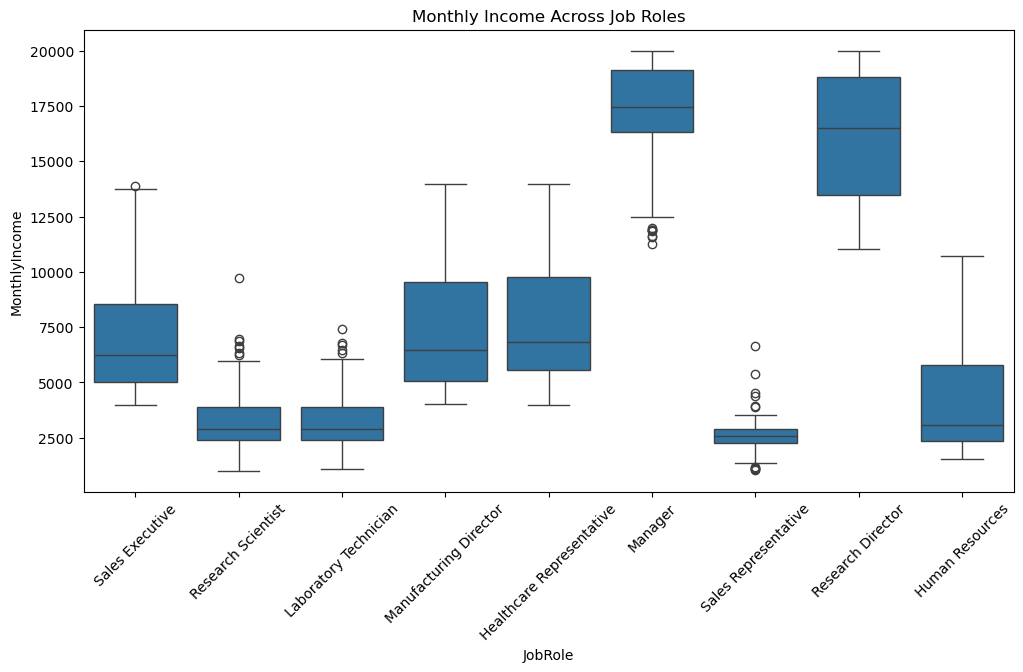

In [26]:
plt.figure(figsize=(12,6))
sns.boxplot(x="JobRole", y="MonthlyIncome", data=df)
plt.title("Monthly Income Across Job Roles")
plt.xticks(rotation=45)
plt.show()


PAIR PLOT FOR NUMERICAL COLUMNS

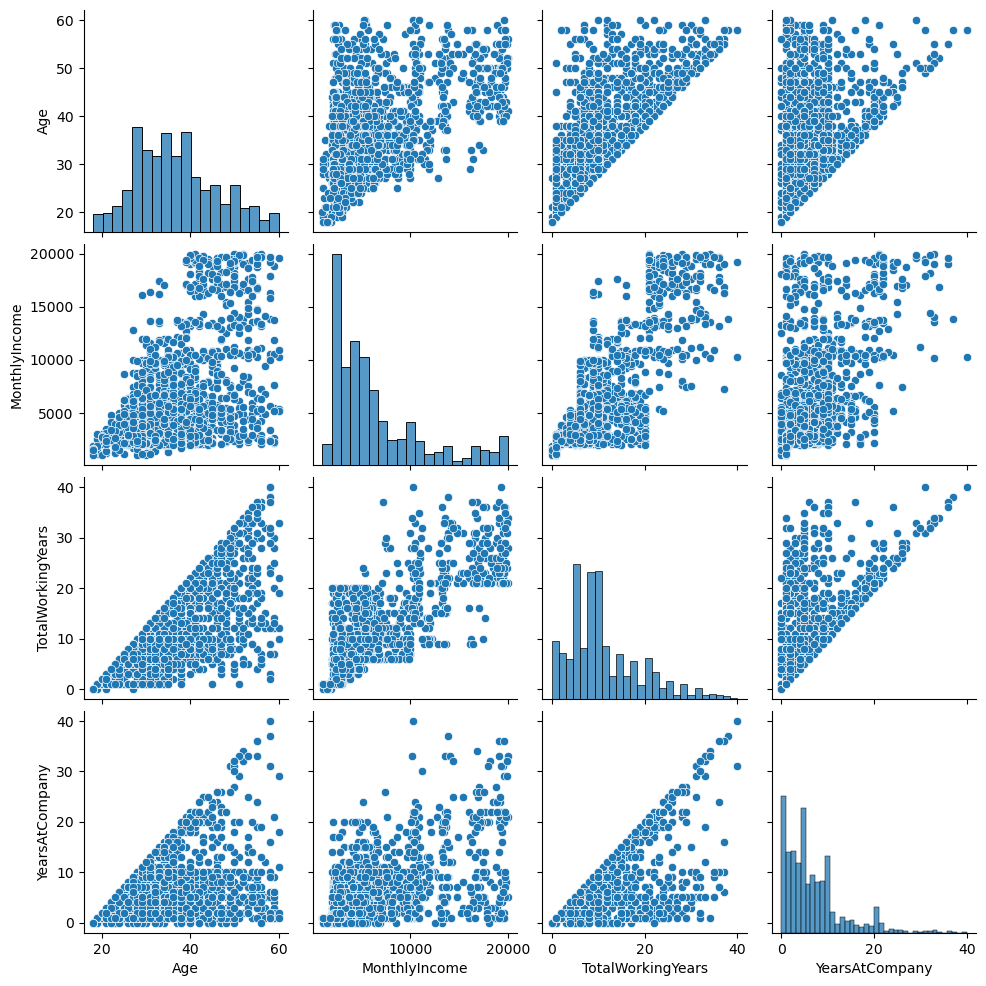

In [27]:
selected_cols = ['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany']
sns.pairplot(df[selected_cols])
plt.show()


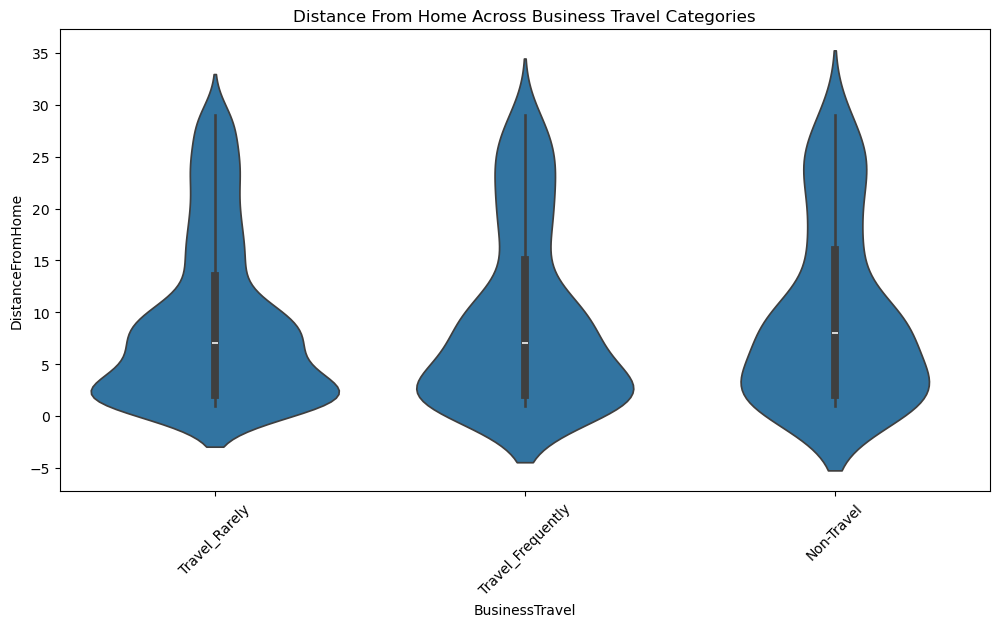

In [28]:
plt.figure(figsize=(12,6))
sns.violinplot(x="BusinessTravel", y="DistanceFromHome", data=df)
plt.title("Distance From Home Across Business Travel Categories")
plt.xticks(rotation=45)
plt.show()

MonthlyIncome Vs JobRole

C:\Users\RAVI OJHA\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 68.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\RAVI OJHA\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 76.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\RAVI OJHA\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 75.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\RAVI OJHA\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 39.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\RAVI OJHA\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning:

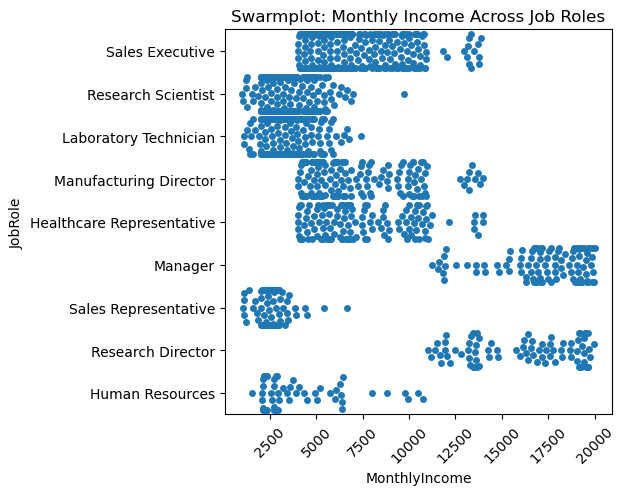

In [29]:
plt.figure(figsize=[5,5])
sns.swarmplot(x="MonthlyIncome",y="JobRole",data=df)
plt.title("Swarmplot: Monthly Income Across Job Roles")
plt.xticks(rotation=45)
plt.show()

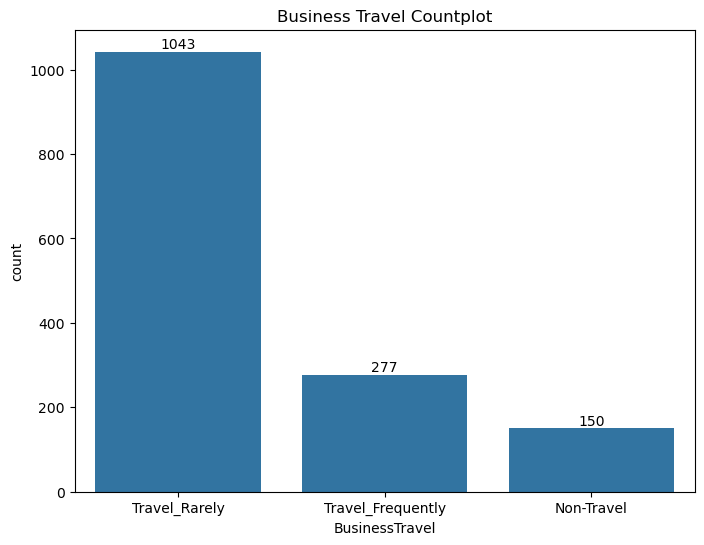

In [30]:
plt.figure(figsize=(8,6))
g = sns.countplot(x="BusinessTravel", data=df)
plt.title("Business Travel Countplot")
for i in g.containers:
    plt.bar_label(i)
plt.show()




Monthly Income vs Total Working Years (Colored by Attrition)

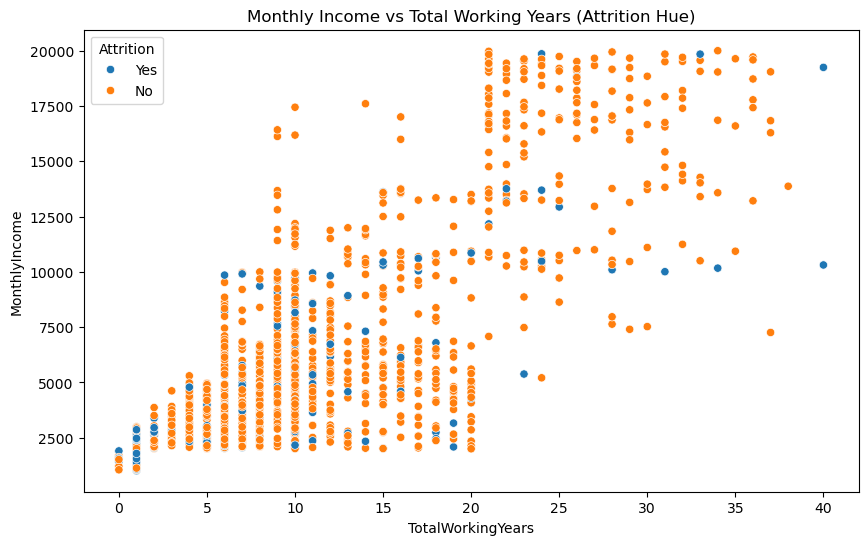

In [31]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="TotalWorkingYears", y="MonthlyIncome", hue="Attrition", data=df)
plt.title("Monthly Income vs Total Working Years (Attrition Hue)")
plt.show()


Attrition Pie Chart

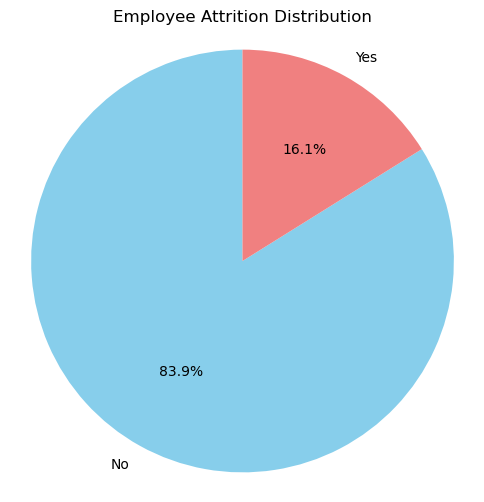

In [32]:
attrition_counts = df['Attrition'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title("Employee Attrition Distribution")
plt.axis('equal')
plt.show()


CHECK OUTLIERS

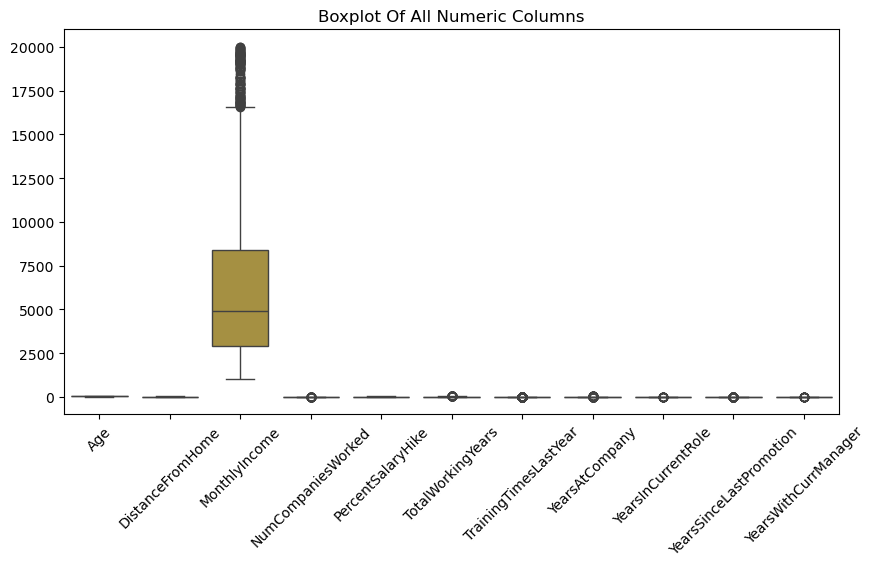

In [33]:
numeric_=df[['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
                     'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
                     'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
                     'YearsWithCurrManager']]


plt.figure(figsize=[10,5])
sns.boxplot(data=numeric_)
plt.title("Boxplot Of All Numeric Columns")
plt.xticks(rotation=45)
plt.show()

USING IQR FOR OUTLIERS DETECTION IN MonthlyIncome Column

<Axes: xlabel='MonthlyIncome', ylabel='Count'>

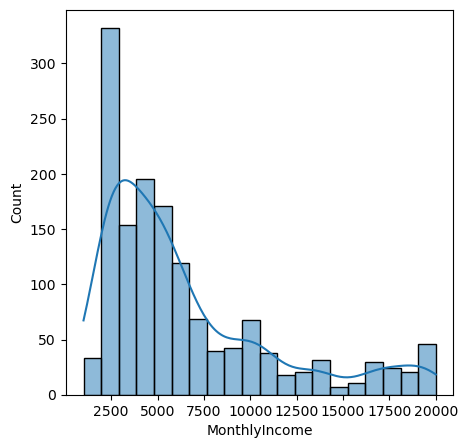

In [34]:
plt.figure(figsize=[5,5])
sns.histplot(df["MonthlyIncome"],kde=True)

In [35]:
#Finding IQR

percentile25=df["MonthlyIncome"].quantile(0.25)
percentile75=df["MonthlyIncome"].quantile(0.75)
print("percentile25",percentile25)
print("percentile75",percentile75)

percentile25 2911.0
percentile75 8379.0


In [36]:
iqr=percentile75-percentile25
iqr

5468.0

In [37]:
#finding upper limit and lower limit

upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr
print("upper limit",upper_limit)
print("lower limit",lower_limit)

upper limit 16581.0
lower limit -5291.0


In [38]:
#Capping the outliers

df['MonthlyIncome'] = df['MonthlyIncome'].clip(lower_limit, upper_limit)

In [39]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6361.891837,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4353.345470,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,16581.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [40]:
percentile25_=df["TrainingTimesLastYear"].quantile(0.25)
percentile75_=df["TrainingTimesLastYear"].quantile(0.75)
print("percentile 25:",percentile25_)
print("percentile 75:",percentile75_)


percentile 25: 2.0
percentile 75: 3.0


In [41]:
iqr_=percentile75_-percentile25_
iqr_

1.0

In [42]:
lower_bond=percentile25_-1.5*iqr_
upper_bond=percentile75_+1.5*iqr_
print("lower_bond:",lower_bond)
print("upper_bond:",upper_bond)

lower_bond: 0.5
upper_bond: 4.5


In [43]:
df["TrainingTimesLastYear"]=df["TrainingTimesLastYear"].clip(lower_bond, upper_bond)

Encoding

ONE HOT ENCODING FOR NON TARGET COLUMN

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

In [45]:
x = df[["BusinessTravel","Department","EducationField","Gender","JobRole","MaritalStatus","OverTime",  ]]  
y = df['Attrition'] 


In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((1176, 7), (294, 7))

In [48]:
from sklearn.preprocessing import OneHotEncoder

In [49]:
ohe=OneHotEncoder(drop="first",sparse_output=False,dtype=np.int32)

x_train_one=ohe.fit_transform(x_train)
x_test_one=ohe.transform(x_test)

LABEL ENCODER FOR TARGET COLUMN

In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
la=LabelEncoder()

la_x_train=la.fit_transform(y_train)
la_x_test=la.transform(y_test)

SCALING USING STANDARD SCALER

In [52]:
numerical_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
                  'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
                  'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
                  'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
                  'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
                  'YearsSinceLastPromotion', 'YearsWithCurrManager']

x1 = df[numerical_cols]


In [53]:
x_train_num,x_test_num=train_test_split(x1,test_size=0.2,random_state=42)

x_train_num.shape,x_test_num.shape

((1176, 23), (294, 23))

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler=StandardScaler()

x_train_num_scaled=scaler.fit_transform(x_train_num)
x_test_num_scaled=scaler.transform(x_test_num)

In [56]:
x_train_scaled=scaler.fit_transform(x_train_one)
x_test_scaled=scaler.transform(x_test_one)

In [57]:
x_train_final=np.concatenate([x_train_num_scaled,x_train_scaled],axis=1)
x_test_final=np.concatenate([x_test_num_scaled,x_test_scaled],axis=1)

In [58]:
x_train_final.shape

(1176, 44)

In [59]:
x_train_scaled.shape

(1176, 21)

APPLY LOGISTICC REGRESSION

In [60]:
# 1️⃣ Import Required Libraries
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [61]:

sm = SMOTE(random_state=42)
x_train_res, y_train_res = sm.fit_resample(x_train_final, la_x_train)

print("Before SMOTE:", x_train_final.shape)
print("After SMOTE:", x_train_res.shape)


Before SMOTE: (1176, 44)
After SMOTE: (1956, 44)


In [62]:
# 3️⃣ Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(x_train_res, y_train_res)

# Predict on test set
y_pred = model.predict(x_test_final)


✅ Accuracy Score: 0.7619047619047619

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.79      0.85       255
           1       0.29      0.56      0.39        39

    accuracy                           0.76       294
   macro avg       0.61      0.68      0.62       294
weighted avg       0.84      0.76      0.79       294



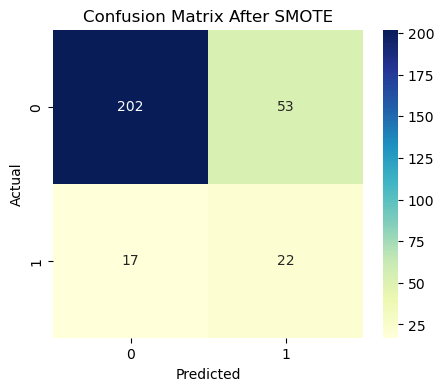

In [63]:
# 4️⃣ Evaluate Model Performance

print("✅ Accuracy Score:", accuracy_score(la_x_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(la_x_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(la_x_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix After SMOTE")
plt.show()


In [64]:
!pip install shap


   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 545.3/545.3 kB 6.0 MB/s eta 0:00:00


In [65]:
import shap

Total Features: 44, Shape of Test Data: (294, 44)


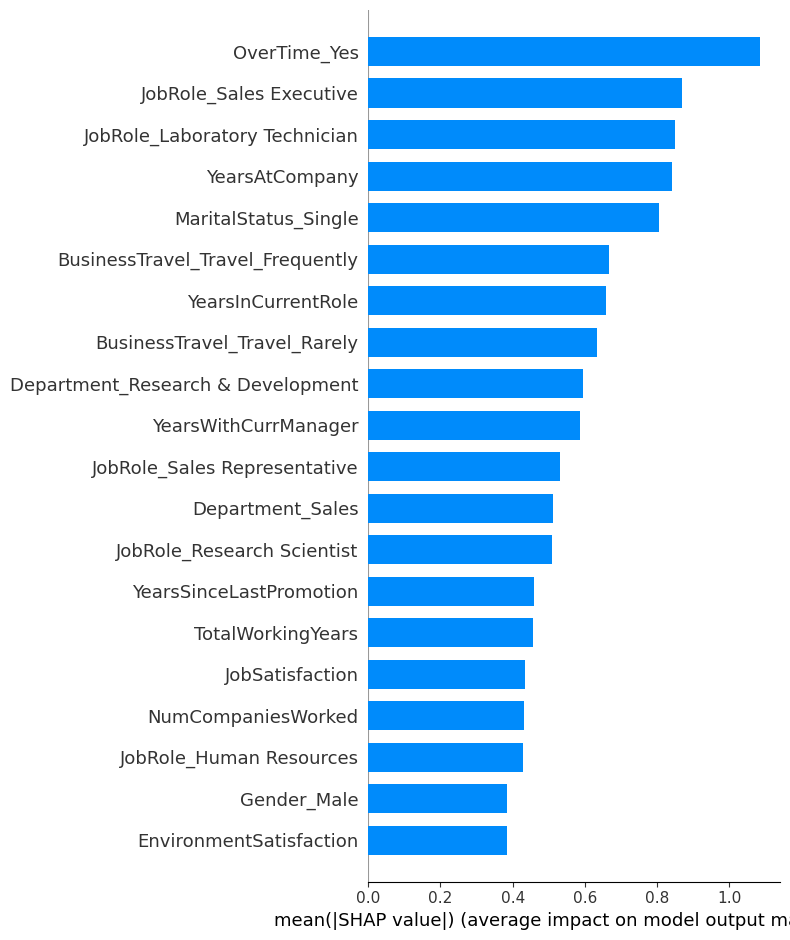

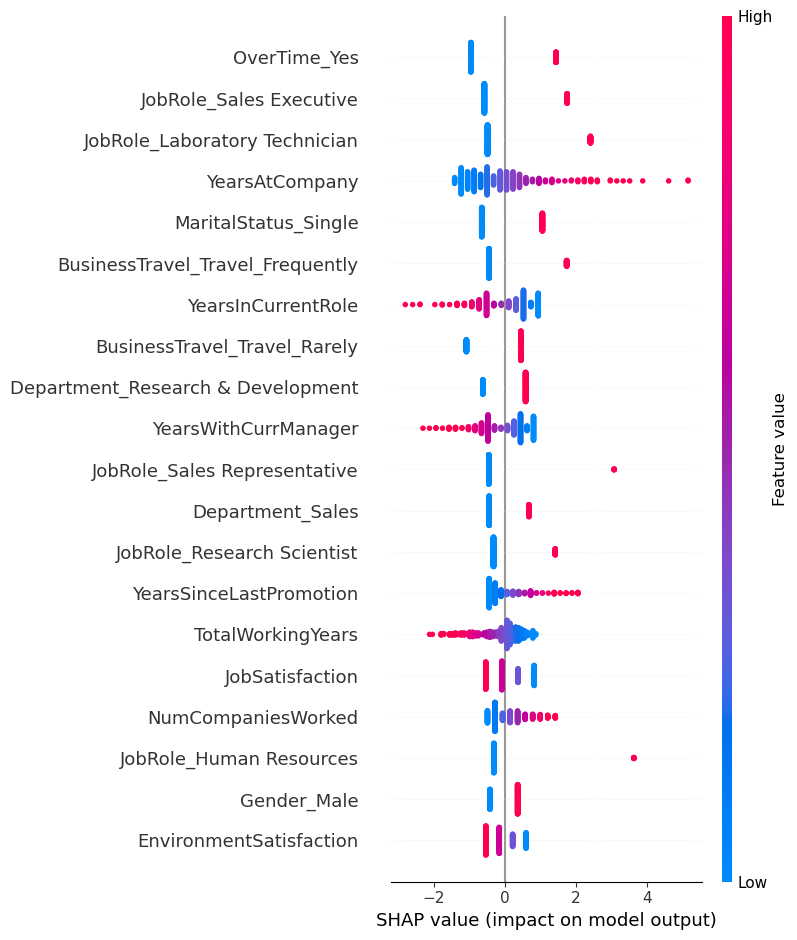

In [66]:
num_feature_names = numerical_cols 
cat_feature_names = ohe.get_feature_names_out(["BusinessTravel","Department","EducationField","Gender","JobRole","MaritalStatus","OverTime"])
feature_names = list(num_feature_names) + list(cat_feature_names)

print(f"Total Features: {len(feature_names)}, Shape of Test Data: {x_test_final.shape}")


bg_idx = np.random.choice(x_train_res.shape[0], size=min(200, x_train_res.shape[0]), replace=False)
background = x_train_res[bg_idx]

explainer = shap.LinearExplainer(model, background)
shap_values = explainer.shap_values(x_test_final)


shap.summary_plot(shap_values, x_test_final, feature_names=feature_names, plot_type="bar")


shap.summary_plot(shap_values, x_test_final, feature_names=feature_names)


In [67]:
mean_abs_shap = np.abs(shap_values).mean(axis=0)
shap_importance = pd.DataFrame({
    "feature": feature_names,
    "mean_abs_shap": mean_abs_shap
}).sort_values(by="mean_abs_shap", ascending=False)
print(shap_importance.head(15))

                              feature  mean_abs_shap
43                       OverTime_Yes       1.085704
39            JobRole_Sales Executive       0.868146
34      JobRole_Laboratory Technician       0.850262
19                     YearsAtCompany       0.840324
42               MaritalStatus_Single       0.805596
23   BusinessTravel_Travel_Frequently       0.665413
20                 YearsInCurrentRole       0.658569
24       BusinessTravel_Travel_Rarely       0.633495
25  Department_Research & Development       0.594884
22               YearsWithCurrManager       0.585990
40       JobRole_Sales Representative       0.529819
26                   Department_Sales       0.511722
38         JobRole_Research Scientist       0.510027
21            YearsSinceLastPromotion       0.458734
16                  TotalWorkingYears       0.455397
